# HMMA308 : TP N°3 Arbres

#### Packages nécessaires :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
import tp_perceptron_script as scrpt
import tp_perceptron_source as src
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import sklearn as skl

#### Nous implémentons la fonction $visualize$_$classifier$ disponible sur : http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html, que l'on utilisera plus tard.

In [142]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
        ax = ax or plt.gca()
       
        # Plot the training points
       
        ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap = cmap,
        clim=(y.min(), y.max()),  zorder=3)
   
       
        ax.axis('tight')
        ax.axis('off')
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
       
        # fit the estimator
        model.fit(X, y)
        xx, yy = np.meshgrid(np.linspace(*xlim, num = 200),
                             np.linspace(*ylim, num = 200))
       
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
       
        # Create a color plot with the results
        n_classes = len(np.unique(y))
        contours = ax.contourf(xx, yy, Z, alpha=0.3,
                               levels=np.arange(n_classes + 1) - 0.5,
                               cmap=cmap, clim=(y.min(), y.max()),
                               zorder=1)
       
        ax.set(xlim = xlim, ylim = ylim)


## Question 1 : 

Minimiser la moyenne des moindres carrées i.e: partager chaque région de façon que les variables d'entrainement soient proches que possible de la valeur prédite. $$ MSE = \sum{(\hat{y} - y_i)^2} $$
$$ \hat{y} = \frac{1}{\hat{p_k}}\sum{y_i} $$

## Préparation de données:

Nous utilisons la fonction $rand$_$checkers$ (cf. les TP précédents) pour simuler un échantillon de taille n = 450,
en vérifiant que les classes sont bien équilibrées. 

In [143]:
n1 = 228
n2 = 228
#456
sigma = 0.1
X, y = src.rand_checkers(n1, n2, sigma)

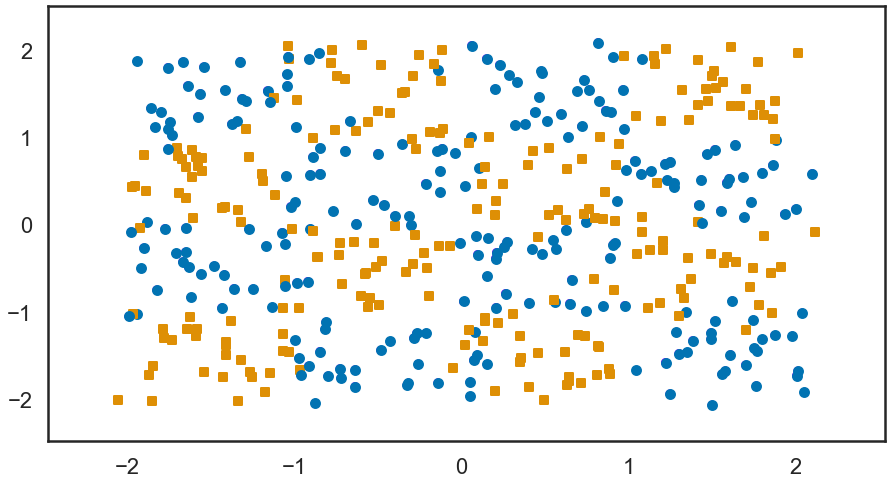

In [144]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');
src.plot_2d(X,y)

plt.show()

Grâce à la fonction $train$_$test$_$split$ du package $sklearn.model$_$selection$, nous faisons une découpe en apprentissage (train) / test, de tailles 80% et 20% respectivement. Cette découpe sera utilisé pour mesurer les erreurs des arbres en fonction de la profondeur maximale. Nous allons comparer entre la courbe de $Gini$ et $Entropy$.

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Avec $scikit-learn$ on peut construire des arbres de décision grâce au package tree. On obtient un
classifeur avec $tree.DecisionTreeClassifier$.

In [147]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=11) # Decision tree classifier, avec le critère entropie.

clf1.fit(X_train, y_train)  # Construit un arbre de décision depuis l'échantillon d'apprentissage (Training set)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Nous appliquerons ensuite notre $Test$ $set$ à l'arbre de décision grâce à la commande $clf1.predict$. Nous obtenons comme sortie, un array contenant la classe de chaque élément du $Test$ $set$

In [148]:
y1_predict=clf1.predict(X_test)
1. - np.sum(y1_predict==y_test)/y1_predict.shape

array([0.47777778])

### Courbes pourcentage d'erreurs commises ( suivant le critère d'entropie et gini) en fonction de la profondeur maximale de l'arbre :

In [149]:
from sklearn.metrics import accuracy_score    # Cette fonction permet de calculer la précision (1 - erreur)

#### Critère Entropy :

In [150]:
#Initialisation :

test_err_entropy=[]   # Liste vierge où on va stocker les erreurs du critère entropy.

#Itérations :

for i in range(80):    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i + 1, random_state = 123)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy_entropy = accuracy_score(y_test, y_predict)

    test_err_entropy.append(1. - accuracy_entropy)
    
print((test_err_entropy))
    

[0.5888888888888889, 0.5666666666666667, 0.5777777777777777, 0.5666666666666667, 0.5666666666666667, 0.5444444444444445, 0.5222222222222221, 0.5111111111111111, 0.4555555555555556, 0.5111111111111111, 0.48888888888888893, 0.4222222222222223, 0.4, 0.3222222222222222, 0.3222222222222222, 0.34444444444444444, 0.33333333333333337, 0.3111111111111111, 0.33333333333333337, 0.3111111111111111, 0.3111111111111111, 0.33333333333333337, 0.3222222222222222, 0.30000000000000004, 0.23333333333333328, 0.24444444444444446, 0.24444444444444446, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.23333333333333328, 0.2

#### Critère Gini :

In [151]:
#Initialisation :

test_err_gini=[]     # Liste vierge où on va stocker les erreurs du critère Gini.

#Itérations :

for i in range(80):    
    clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i + 1, random_state = 123)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    accuracy_gini = accuracy_score(y_test, y_predict)
    test_err_gini.append(1 - accuracy_gini)

print(test_err_gini)

[0.5888888888888889, 0.5555555555555556, 0.5666666666666667, 0.5111111111111111, 0.47777777777777775, 0.4, 0.3222222222222222, 0.30000000000000004, 0.2777777777777778, 0.23333333333333328, 0.2222222222222222, 0.2222222222222222, 0.21111111111111114, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.1999999999999

#### Nous afficherons ensuite les deux courbes des listes des erreurs ( $Entropy$ et $Gini$ )

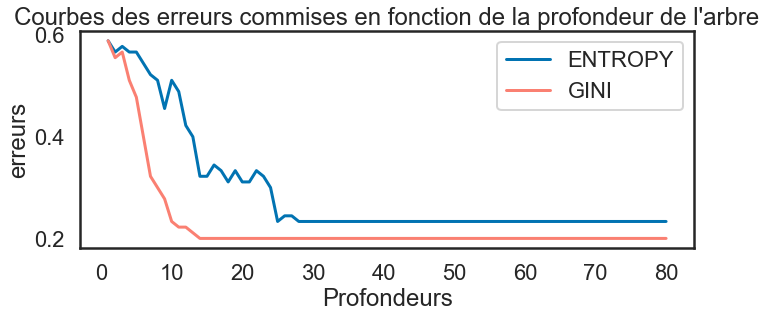

In [152]:
plt.figure(figsize = (11, 4))
absc = range(1, len(test_err_entropy) + 1) #abscices entropy
plt.plot(absc, test_err_entropy, label = 'ENTROPY', )

absc_gini = range(1, len(test_err_gini) + 1) #abscices gini
plt.plot(absc_gini, test_err_gini, c = 'salmon', label = 'GINI')

plt.xlabel("Profondeurs")
plt.ylabel("erreurs")

plt.title("Courbes des erreurs commises en fonction de la profondeur de l'arbre")
plt.legend()
plt.show()

$Moralité$ : $L'erreur$ $minimale$ $est$ $atteinte$ $pour$ $une$ $profondeur$ $de$ $12.$

C:\Users\Luana\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'clim'


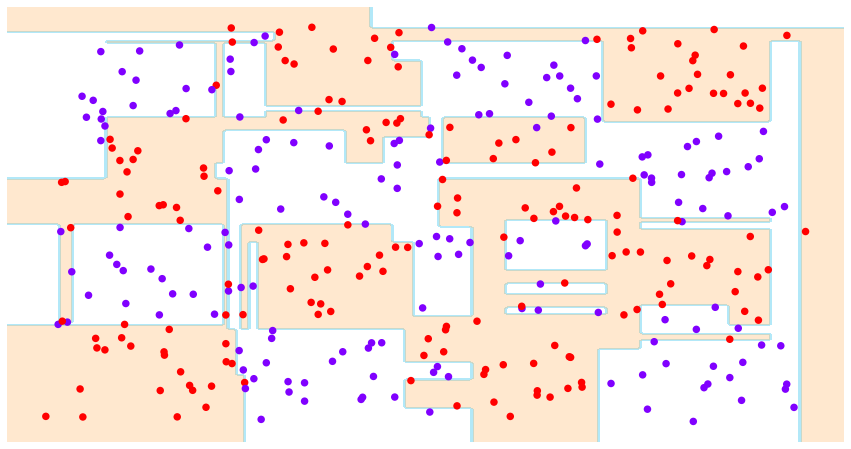

In [153]:

 visualize_classifier(clf, X_train, y_train)

# 3)-Visualize the output of the classifier:

25


C:\Users\Luana\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'clim'


Text(0.5, 1, 'depth = 25')

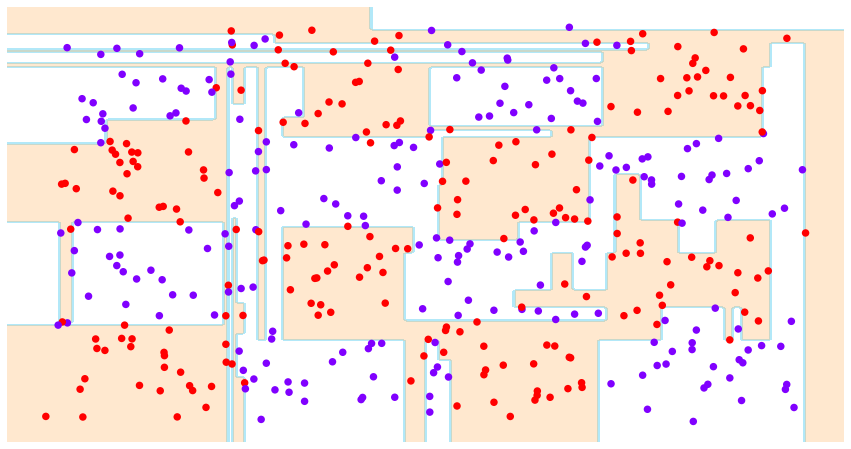

In [154]:
#fig, ax = plt.subplots(1, 4, figsize=(16, 3))
#fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

optimal = np.argmin(test_err_entropy) + 1
print(optimal)
#for axi, depth in zip(ax, [1, 4,optimal,100]):
model = tree.DecisionTreeClassifier(max_depth = optimal)
visualize_classifier(model, X, y)
axi.set_title('depth = {0}'.format(optimal))

#fig.savefig('/home/e20180009724/Bureau/Arbres TP/05.08-decision-tree-levels.png')

## 4) Exportation d'un graphique de l'arbre obtenu à la question précédente en format pdf. Nous utiliserons la fonction $export$_$graphviz$ du module $tree$.

In [156]:
from sklearn.tree import export_graphviz

data = open("C:/Users/Luana/Documents/HMMA308 2019-2020/arbre_entropy.dot", 'w')
export_graphviz(clf1, out_file = 'arbre_entropy.dot', rounded=True, proportion = False, filled = True )

In [157]:
from subprocess import call
call(['dot', '-Tpng', 'arbre_entropy.dot', '-o', 
      'C:/Users/Luana/Documents/HMMA308 2019-2020/arbre_entropy.png', '-Gdpi=600'])

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable

## 5) Dans cette question, nous créons un jeu de donnés avec 4 classes (n = 160 = 40 + 40 + 40 + 40 nouvelles données), avec $rand$_$checkers$. Puis nous calculerons la proportion d'erreurs faites sur cet échantillon de test, pour les arbres de décision entrainés précédemment.

In [ ]:
n1 = 40
n2 = 40
n3 = 40
n4 = 40
sigma = 0.1

# Création de deux jeux de données avec 2 classes de 40 chacun. Ce qui nous donne 4 classes avec les labels -2, -1, 1, 2
X1, y1 = src.rand_checkers(n1, n2, sigma)
X2, y2 = src.rand_checkers(n3, n4, sigma)

# Concaténation des jeux de données. 
XX = np.concatenate((X1, X2))
YY = np.concatenate((y1, 2 * y2))



In [158]:
 XX_train, XX_test, yy_train, yy_test = train_test_split(XX, YY, test_size=0.2)

C:\Users\Luana\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'clim'


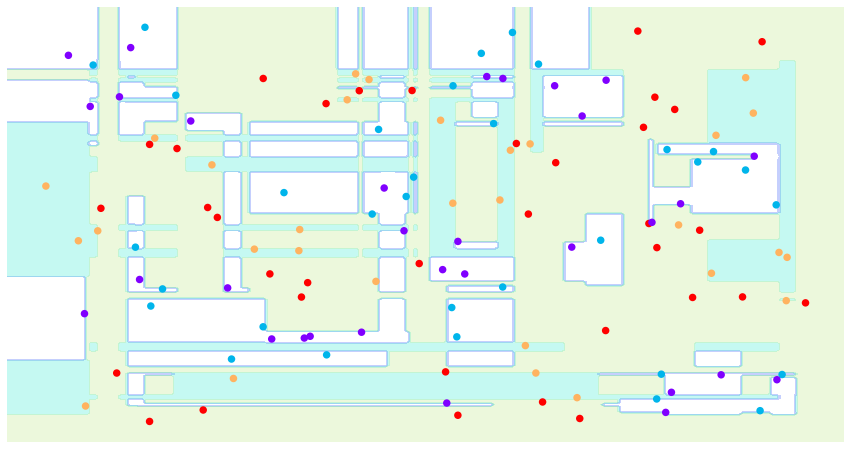

In [159]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
 
#model = tree.DecisionTreeClassifier(max_depth = optimal)

ovo_clf = OneVsRestClassifier(model)
ovo_clf.fit(XX_train, yy_train)

visualize_classifier(ovo_clf,XX_train,yy_train,cmap='rainbow')


No handles with labels found to put in legend.


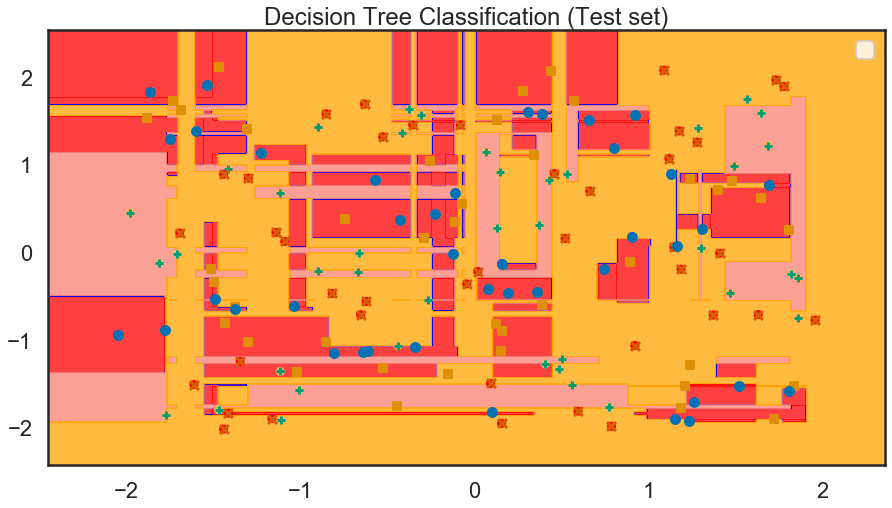

In [160]:

X_set, y_set = XX_test, yy_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, ovo_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue','salmon','orange')))#ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#for i, j in enumerate(np.unique(y_set)):
 #   plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],  c = ListedColormap(('red', 'blue','salmon','orange'))(i), label = j)
               # c = ListedColormap(('red', 'green'))(i), label = j)
plt.scatter(XX[:, 0], XX[:, 1], c = YY, s = 50, cmap = 'rainbow');
src.plot_2d(XX, YY)
#plt.legend()
#plt.show()
plt.title('Decision Tree Classification (Test set)')
plt.legend()
plt.show()

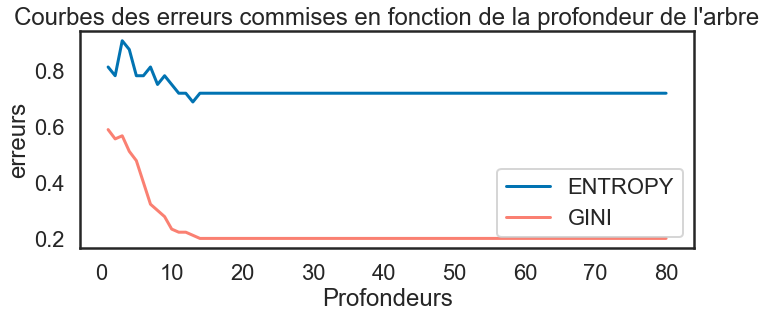

In [161]:
#Initialisation :

test_err_entropy_XX=[]   # Liste vierge où on va stocker les erreurs du critère entropy.

#Itérations :

for i in range(80):    
    clf_XX = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i + 1, random_state = 123)
    clf_XX.fit(XX_train, yy_train)
    yy_predict = clf_XX.predict(XX_test)
    accuracy_entropy = accuracy_score(yy_test, yy_predict)

    test_err_entropy_XX.append(1. - accuracy_entropy)
    


#Initialisation :

test_err_gini_XX = []     # Liste vierge où on va stocker les erreurs du critère Gini.

#Itérations :

for i in range(80):    
    clf_XX = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i + 1, random_state = 123)
    clf_XX.fit(XX_train, yy_train)
    yy_predict = clf_XX.predict(XX_test)
    accuracy_gini = accuracy_score(yy_test, yy_predict)
    test_err_gini_XX.append(1 - accuracy_gini)



plt.figure(figsize = (11, 4))
absc_entropy = range(1, len(test_err_entropy_XX) + 1) #abscices entropy
plt.plot(absc_entropy, test_err_entropy_XX, label = 'ENTROPY', )

absc_gini = range(1, len(test_err_gini_XX) + 1) #abscices gini
plt.plot(absc_gini, test_err_gini, c = 'salmon', label = 'GINI')

plt.xlabel("Profondeurs")
plt.ylabel("erreurs")

plt.title("Courbes des erreurs commises en fonction de la profondeur de l'arbre")
plt.legend()
plt.show()